Praktikum zu Vorlesung
[__Modellreduktion parametrisierter Systeme__](https://www.uni-muenster.de/AMM/Veranstaltungen/SS19/Modellreduktion/)

Mario Ohlberger, Felix Schindler, Tim Keil

# Blatt 04, 15.05.2019

* Aktivieren Sie wie gewohnt ihre Arbeitsumgebung und starten Sie den Jupyter Notebook server, siehe zB [Blatt 1, Aufgabe 0](https://www.uni-muenster.de/AMM/Veranstaltungen/SS19/Modellreduktion/blatt_01__aufgaben.html#Aufgabe-0:-jupyter-Notebook-Server-starten).

* Erstellen Sie ein neues `Python 3` Notebook oder laden Sie dieses von der Homepage herunter.

* Laden Sie die Bilder RB.png, R.png, B.png von der Homepage herunter.

* Importieren Sie `numpy` und `pymor.basic` und machen Sie `matplotlib` für das Notebook nutzbar.

In [1]:
%matplotlib notebook
import numpy as np
from pymor.basic import *

## Aufgabe 1: parametrische Diffusion

Wir betrachten wieder das Diffusionsproblem aus [Blatt 03, Aufgabe 2](https://www.uni-muenster.de/AMM/Veranstaltungen/SS19/Modellreduktion/blatt_03__aufgaben.html#Aufgabe-2:-Neumann-R%C3%A4nder). In dieser Aufgabe wollen wir die zugehörige Diffusion $A_\mu$ parametrisieren, d.h. wir suchen zu einem Parameter $\mu \in \mathbb{R}$ eine schwache Lösung $u_\mu \in H^1(\Omega)$, sodass

$$\begin{align}
-\nabla\cdot( A_\mu \nabla u_\mu ) &= f &&\text{in } \Omega\\
u_\mu &= g_\text{D} &&\text{auf } \Gamma_\text{D}\\
- (A_\mu \nabla u_\mu) \cdot n &= g_{\text{N}} &&\text{auf } \Gamma_\text{N}\\
\end{align}$$

für die Datenfunktionen

* $f = 0$
* $g_\text{D} = 0$
* $g_\text{N} = -1$



1. Legen Sie erneut die zugehörigen Datenfunktionen für $f, g_\text{D}, g_\text{N}$ und die zugehörige Domaindiskretiserung an.




In [2]:
domain = RectDomain([[0,0],[1,1]], bottom='neumann')
force = ConstantFunction(0,2)
dirichlet_data = ConstantFunction(0,2)
neumann_data = ConstantFunction(-1,2)

2. Nun wollen wir zunächst eine nichtparametrische Diffusion $A_\mu$ betrachten. Die `BitmapFunction` verwendet die Python Imaging Library (PIL) um ein Graustufenbild in üblichen Grafik-Dateiformaten einzulesen. Wir verwenden hier die folgende Grafik: ![RB.png](RB.png) Machen Sie sich mit der Benutzung der `BitmapFunction` vertraut und nutzen Sie die Funktion um ihre Diffusion $A_\mu$ zu definieren. Hinweis: Achten Sie darauf, dass die `range` der Funktion nicht bis $0$ gehen darf, da sonst das Problem keine Lösung hätte.

In [3]:
# BitmapFunction?

In [4]:
diffusion = BitmapFunction('RB.png', range=[0.001, 1])

00:00 |WARNING|BitmapFunction: Image RB.png not in grayscale mode. Convertig to grayscale.


3. Legen Sie zu den oben genannten Datenfunktionen ein `StationaryProblem` mit dem Namen `problem_3` an. 

In [5]:
problem_3 = StationaryProblem(
    domain=domain,
    diffusion=diffusion,
    neumann_data=neumann_data
)

4. CG-Diskretisieren Sie `problem_3` und visualisieren Sie die Lösung. Wählen Sie hierbei die Gitterweite klein genug, damit das RB zu erkennen ist. 

<IPython.core.display.Javascript object>


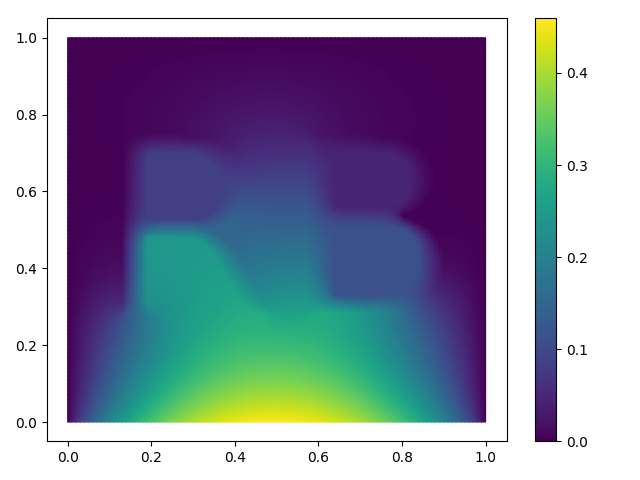

In [6]:
set_log_levels({'pymor': 'WARN'})

d, data = discretize_stationary_cg(problem_3, diameter=1/100)
d.visualize(d.solve())

5. Benutzen Sie die Diskretiserung und die Lagrange interpolation der vorherigen Zettel um die Diffusion zu visualisieren.

<IPython.core.display.Javascript object>


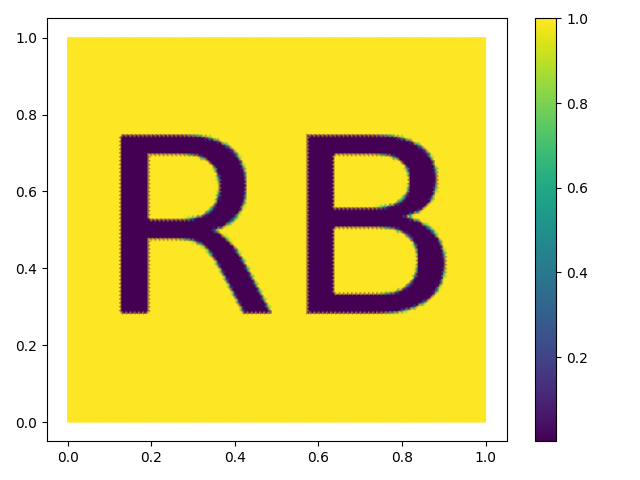

In [7]:
from interpolations import interpolate_lagrange_p1

d.visualize(interpolate_lagrange_p1(problem_3.diffusion, data['grid']))

6. Nun wollen wir $A_\mu$ parametrisieren. Dazu trennen wir den RB string in seine einzelnen Buchstaben auf. Wir benötigen also die einzelnen Grafiken für die Buchstaben 'R' und 'B': ![R.png](R.png) ![B.png](B.png) Verwenden Sie erneut die `BitmapFunction` um eine Diffusion auf R und B zu  definieren. Erlauben Sie dieses mal, dass die `range` der Bilder auch $0$ sein darf. 

In [8]:
diffusion_R = BitmapFunction('R.png', range=[1, 0])
diffusion_B = BitmapFunction('B.png', range=[1, 0])

00:01 |WARNING|BitmapFunction: Image R.png not in grayscale mode. Convertig to grayscale.
00:01 |WARNING|BitmapFunction: Image B.png not in grayscale mode. Convertig to grayscale.


7. Um diese Funktionen zu einer Gesamt-Funktion zusammenzusetzen verwenden wir eine `LincombFunction` die eine Liste von Funkionen und eine Liste von Linearkoeffizieten erhält . Parametrische Linearkoeffizienten werden mit Hilfe von `ParameterFunktionalen` (siehe `pymor.parameters.functionals`) realisiert. Erstellen Sie eine `LincombFunction`, die einen Konstanten  Hintergrund mit Wert, und beide parametrisierten Buchstaben zu Linearkombination vereint.  

    - Hinweis: Hierbei soll die Wahl $\mu_R = 1$ bzw. $\mu_B = 1$ bedeuten, dass der entsprechende Buchstabe vollständig aus dem Lösungsbild verschwindet.   

In [9]:
# LincombFunction?

In [10]:
diffusion = LincombFunction(
    [ConstantFunction(1., 2), diffusion_R, diffusion_B],
    [1, ExpressionParameterFunctional('-(1 - R)', {'R': ()}), ExpressionParameterFunctional('-(1 - B)', {'B': ()})]
)
print(diffusion.parameter_type)

{'B': (), 'R': ()}


7. Definieren sie ihr parametrisiertes Problem und diskretiseren Sie es erneut mit CG und Gitterweite 1/100.

In [11]:
problem = StationaryProblem(
    domain=domain,
    diffusion=diffusion,
    neumann_data=ConstantFunction(-1, 2)
)
d, data = discretize_stationary_cg(problem, diameter=1/100)

8. Lösen und visualisieren Sie das Problem. Wählen Sie ihre Parameter jeweils so, dass beide, nur das R und nur das B in der Lösung zu erkennen sind. Hierbei ist es wichtig, dass die Zuvor definierte `LincombFunction` dies überhaupt ermöglicht.

<IPython.core.display.Javascript object>


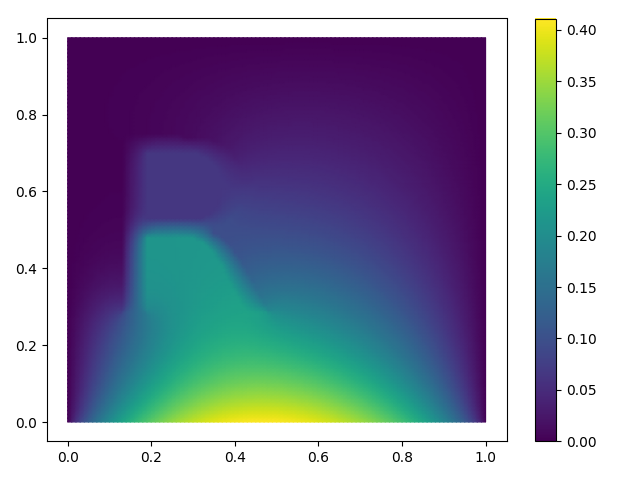

<IPython.core.display.Javascript object>


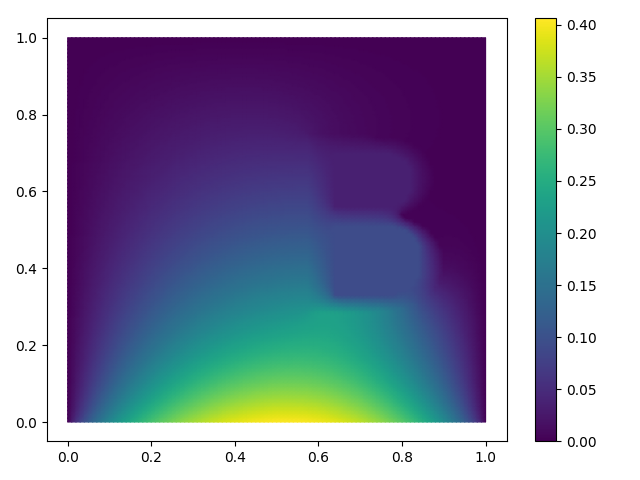

<IPython.core.display.Javascript object>


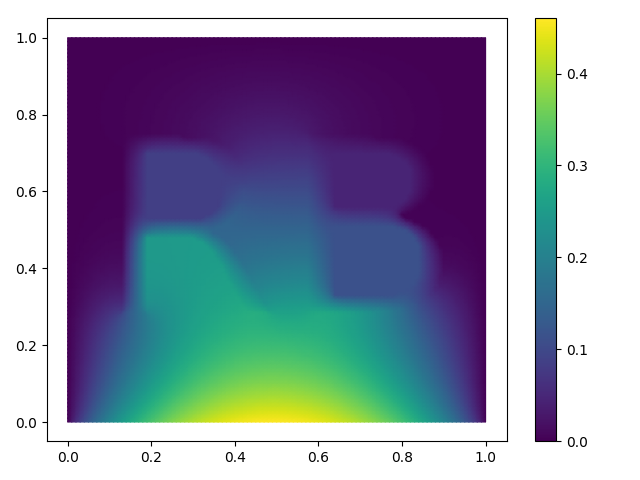

In [24]:
d.visualize(d.solve([1., 0.001]))
d.visualize(d.solve([0.001, 1]))
d.visualize(d.solve([0.001,0.001]))

## Aufgabe 2: Parameterräume

Wir wollen nun das oben definierte Problem mit einem Parameterraum ausstatten. 

1. Benutzen Sie ihre Diskretisierung aus Teilaufgabe 7 um eine neue Diskretisierung anzulegen, die mit einem kubischen Parameterraum ausgestattet ist. Finden Sie die entsprechende Klasse im `pymor.parameters ` Package in der Dokumentation. 

In [13]:
print(d.parameter_type)
print(d.parameter_space)

d = d.with_(parameter_space=CubicParameterSpace(d.parameter_type, 0.001, 1.))
print(d.parameter_space)

{'B': (), 'R': ()}
None
CubicParameterSpace
key: B,  shape: (),  range: (0.001, 1.0)
key: R,  shape: (),  range: (0.001, 1.0)


2. Mit einem `ParameterSpace` kann man eine Menge von Parametern wählen (zum Beispiel um einen Greedy Algorithmus auszuführen). Erstellen Sie zunächst mit Hilfe des zuvor angelegten ParameterSpaces 100 gleichverteilte Parameter und geben Sie diese aus. Überprüfen Sie die Anzahl der so erstellten Parameter. 

In [14]:
mus = d.parameter_space.sample_uniformly(10)
print(len(mus)) # obwohl 10 gesampled wurden haben wir 100 parameter, nml 10 bzgl. jeder parameterdimension!
# die zahl gibt also die Anzahl der samplingpunkte pro Dimension an.
for mu in mus:
    print(mu)

100
{B: 0.001, R: 0.001}
{B: 0.001, R: 0.112}
{B: 0.001, R: 0.223}
{B: 0.001, R: 0.334}
{B: 0.001, R: 0.445}
{B: 0.001, R: 0.556}
{B: 0.001, R: 0.667}
{B: 0.001, R: 0.778}
{B: 0.001, R: 0.889}
{B: 0.001, R: 1.0}
{B: 0.112, R: 0.001}
{B: 0.112, R: 0.112}
{B: 0.112, R: 0.223}
{B: 0.112, R: 0.334}
{B: 0.112, R: 0.445}
{B: 0.112, R: 0.556}
{B: 0.112, R: 0.667}
{B: 0.112, R: 0.778}
{B: 0.112, R: 0.889}
{B: 0.112, R: 1.0}
{B: 0.223, R: 0.001}
{B: 0.223, R: 0.112}
{B: 0.223, R: 0.223}
{B: 0.223, R: 0.334}
{B: 0.223, R: 0.445}
{B: 0.223, R: 0.556}
{B: 0.223, R: 0.667}
{B: 0.223, R: 0.778}
{B: 0.223, R: 0.889}
{B: 0.223, R: 1.0}
{B: 0.334, R: 0.001}
{B: 0.334, R: 0.112}
{B: 0.334, R: 0.223}
{B: 0.334, R: 0.334}
{B: 0.334, R: 0.445}
{B: 0.334, R: 0.556}
{B: 0.334, R: 0.667}
{B: 0.334, R: 0.778}
{B: 0.334, R: 0.889}
{B: 0.334, R: 1.0}
{B: 0.445, R: 0.001}
{B: 0.445, R: 0.112}
{B: 0.445, R: 0.223}
{B: 0.445, R: 0.334}
{B: 0.445, R: 0.445}
{B: 0.445, R: 0.556}
{B: 0.445, R: 0.667}
{B: 0.445, R: 0.7

3. Erstellen Sie nun 5 zufällig gewählte Parameter. Wie können Sie diesen Zufall dennoch deterministisch kontrollieren? Erstellen Sie zweimal hintereindern die selbe "zufällige" Menge von Parametern. 

In [15]:
for mu in d.parameter_space.sample_randomly(5, seed=1): # hier gibt 10 wirklich die Zahl der Parameter an, die "zufällig" generiert werden
    print(mu)

{B: 0.41760498269787144, R: 0.7206041689487159}
{B: 0.0011142604425275417, R: 0.3030302400592079}
{B: 0.14760913492629593, R: 0.093246256174029}
{B: 0.18707395116629325, R: 0.3462151663160047}
{B: 0.39737070675643926, R: 0.5392779172693536}


In [16]:
for mu in d.parameter_space.sample_randomly(5): 
    print(mu)  # Hier kommt nicht das selbe wie oben rausraus

{B: 0.37516557872851514, R: 0.9507635921035062}
{B: 0.7322619478695936, R: 0.5990598257128396}
{B: 0.1568626218019941, R: 0.15683852581586644}
{B: 0.05902552855603126, R: 0.8663099696291603}
{B: 0.6015138967314656, R: 0.7083645052182495}


In [17]:
for mu in d.parameter_space.sample_randomly(5, seed=1): 
    print(mu)  # Hier schon

{B: 0.41760498269787144, R: 0.7206041689487159}
{B: 0.0011142604425275417, R: 0.3030302400592079}
{B: 0.14760913492629593, R: 0.093246256174029}
{B: 0.18707395116629325, R: 0.3462151663160047}
{B: 0.39737070675643926, R: 0.5392779172693536}


4. Erstellen sie mit 30 zufälligen Parametern eine Menge von Lösungsvektoren. Speichern Sie die erhaltenen Lösungen in einem `VectorArray U`. 

In [18]:
U = d.solution_space.empty()
print(type(U))
for mu in d.parameter_space.sample_randomly(30):
    U.append(d.solve(mu))

<class 'pymor.vectorarrays.numpy.NumpyVectorArray'>


In [19]:
print(len(U))
print(U.dim)

30
20201


5. Visualisieren Sie das `VectorArray U`. Warum schlägt dies fehl? Wie können Sie den Fehler lösen? 

<IPython.core.display.Javascript object>


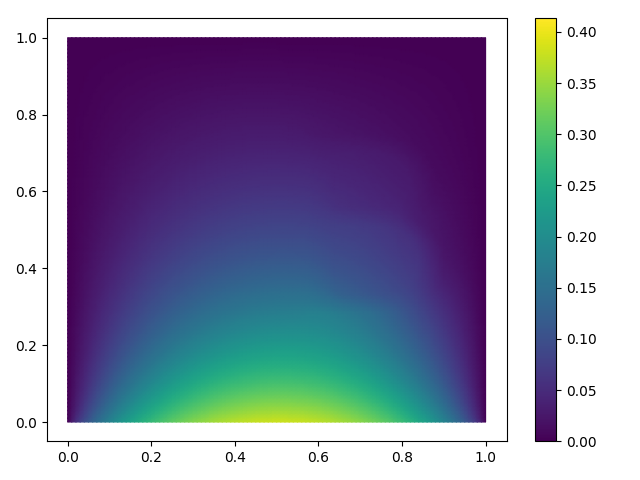

interactive(children=(IntSlider(value=0, description='t', max=29), Output()), _dom_classes=('widget-interact',…

In [20]:
d.visualize(U)

6. Geben Sie außerdem die $H^1$- und die $H^1_0$- Normen der Vektoren in `U` aus. 

In [1]:
print('H^1-Norm:', d.h1_0_norm(U)) # norm pro Vektor in U 
print('H^1_0-Norm:', d.h1_0_semi_norm(U))
assert np.all(d.h1_0_semi_norm(U) <= d.h1_0_norm(U))

NameError: name 'd' is not defined

**Achtung: `d` besitzt außerdem die Normen `d.h1_norm` und `d.h1_semi_norm`, die sich von obigen nur um die Randwertbehandlung der zugrunde liegenden Systemmatrizen unterscheiden. Bei der Berechnung von Normen von $H^1_0$-Funktionen liefern beide Varianten das selbe Ergebnis. Für die Berechnung von Riesz-Repräsentanten muss jedoch unbedingt das für den jeweiligen Raum ($H^1$ bzw. $H^1_0$) korrekt assemblierte Skalarprodukt verwendet werden.**

## Aufgabe 3: Approximierbarkeit einer Menge von Vektoren

Eine Menge von Vektoren $u_1, \dots, u_{30} \in V$ eines Hilbertraumes $V$ bilden einen Unterraum $U \subset V$, dessen Elemente Linearkombinationen der $u_i$ sind.
Betrachten wir zu diesem Unterraum den Operator $\underline{U}: \mathbb{R}^{30} \to V$, der den Vorfaktoren der Linearkombination die fertige Linearkombination zuordnet, dann ist die Matrixdarstellung des Operators $\underline{U} \in \mathbb{R}^{\dim(V) \times 30}$ genau gegeben, indem die $i$te Spalte von $\underline{U}$ der Vektor $u_i$ ist. Damit ist klar, dass die Anwendung des Operators, also die Matrix/Vektor Multiplikation genau die Linearkomintaion ist). Dann gilt, dass der von $u_1, \dots, u_{30}$ aufgespannte Unterraum $U \subset V$ genau mit dem Bild des Operators übereinstimmt.

Ein Ziel der Modellreduktion ist es, einen Unterraum kleinerer Dimension zu finden, der eine hinreichend gute Approximation des zu reduzierenden Unterraumes $U$ ist. Dazu können wir untersuchen wie gut wir das Bild des zugehörigen Operators approximieren können. 

Als linearer Operator zwischen endlichdimensionalen Hilberträumen ist der Operator kompakt, d.h. mit dem Spektralsatz aus der Funktionalanalysis ist eine Basis von $U$ genau durch die Links-Singulärvektoren des Operators gegeben. Die "Wichtigkeit" der Elemente der Basis wird durch die Größe des Singulärwertes angezeigt, der zum Vektor gehört.

Schauen wir uns also die Singulärwertzerlegung der Matrixdarstellung von Operatoren an.

1. Wir starten mit einem sehr einfachen Beispiel eines nicht approximierbaren Operators.
    - Erstellen Sie eine Einheitsmatrix die der Länge von `U` aus Aufgabe 2 entspricht. 
    - Finden Sie eine Möglichkeit die zugehörigen Singulärwerte zu berechnen und geben Sie diese aus. 
    - Erstellen Sie einen Plot der den Abfall der Singulärvektoren für diesen Fall darstellt. Was fällt Ihnen auf?

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


<IPython.core.display.Javascript object>


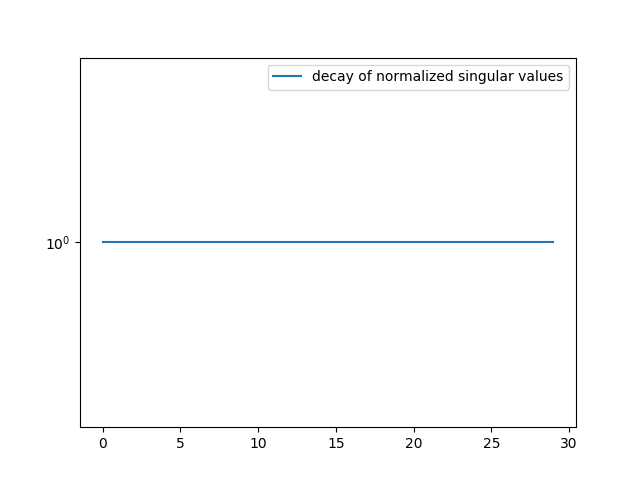

/home/tim/Documents/Lehre/Modellreduktion2019/venv/lib/python3.6/site-packages/matplotlib/axes/_base.py:3507: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=1.0, top=1.0
  self.set_ylim(upper, lower, auto=None)


In [22]:
from scipy.linalg import svdvals
SVALS = svdvals(np.eye(len(U)))
print(SVALS)

from matplotlib import pyplot as plt
plt.figure()
plt.semilogy(SVALS/np.max(SVALS), label='decay of normalized singular values')
plt.legend()

2. Betrachten Sie nun die Vektoren in $U$. Da $U$ aus Lösungen der PDE für zufällige Paramter besteht, wissen wir nicht, ob diese linear abhängig sind und wie gut sie durch eine kleinere Menge von Vektoren approximiert werden können. Berechnen Sie die Singulärwerte und stellen sie den Abfall wieder grafisch dar. 

[9.70832735e+01 2.97589620e+00 2.28893524e+00 3.95927873e-01
 1.98407376e-01 1.08876667e-01 4.19168026e-02 3.67554657e-02
 6.65525274e-03 3.67461574e-03 2.11456608e-03 1.77213169e-03
 8.23296042e-04 4.11893212e-04 2.12130421e-04 1.31482789e-04
 1.20775698e-04 6.82015882e-05 3.33365132e-05 2.09904059e-05
 1.59911232e-05 1.12314812e-05 5.92719570e-06 5.25413294e-06
 2.75591497e-06 1.06448832e-06 5.35250302e-07 3.65034057e-07
 9.71896450e-08 3.23291366e-08]


<IPython.core.display.Javascript object>


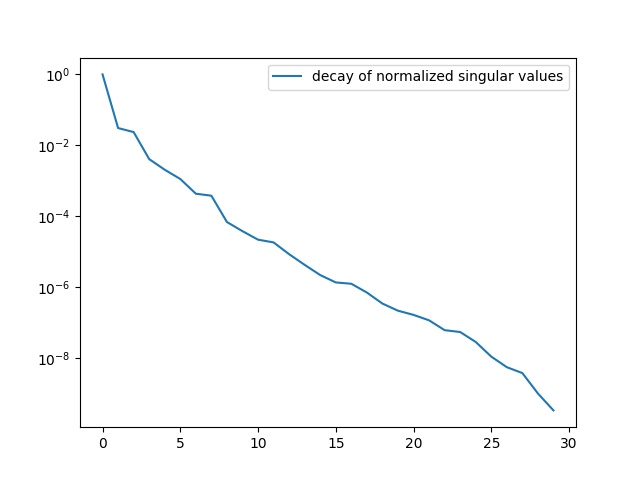

In [23]:
SVALS = svdvals(U.data)
print(SVALS)

plt.figure()
plt.semilogy(SVALS/np.max(SVALS), label='decay of normalized singular values')
plt.legend()

Grob gesagt: um alle Vektoren in `U` mit einer relativen Genauigkeit von $10^{-3}$ zu approximieren genügen ca. 5 Vektoren (Modellreduktion kann also erfolgreich sein). Es ist aber dennoch nicht klar welche Vektoren diese 5 Vektoren sind.

Wenn man schon alle Vektoren berechnet hat und an der $L^2$ Bestapproximation interessiert ist, dann dies die Linkssingulärvektoren zu den größten Singulärwerten, siehe oben. Dann ist unsere Modellreduktion aber unter Umständen nicht mehr notwendig, da wir schon jede Lösung bestimmt haben.

Man will aber nicht vorher alle Vektoren berechnen, da kommt dann der Greedy Algorithmus ins Spiel. 
In jedem Fall benötigt man eine Projektion auf einen Unterraum, der von nur wenigen Vektoren aufgespannt wird (zB von `U`, oder von einer Teilmenge). Außerdem muss der Approximationsfehler hinreichend klein sein. Dazu später mehr...